# Лабораторная работа №3 Обработка признаков Часть 2

**Цель лабораторной работы:** изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

**Задание:**

* Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
* Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
    1. масштабирование признаков (не менее чем тремя способами);
    2. обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
    3. обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
    4. отбор признаков:
        * один метод из группы методов фильтрации (filter methods);
        * один метод из группы методов обертывания (wrapper methods);
        * один метод из группы методов вложений (embedded methods).

**Выбранный датасет:** 

**1. Boston Housing Dataset**

**Ссылка**: https://www.kaggle.com/datasets/altavish/boston-housing-dataset

**Колонки**:
- **CRIM**: Уровень преступности на душу населения
- **ZN**: Доля земли под застройку, зонированная под жилые дома с участками более 25,000 кв. футов
- **INDUS**: Доля не розничных бизнес-акров на город
- **CHAS**: Прилегает к реке Чарльз (1 = да, 0 = нет)
- **NOX**: Концентрация оксидов азота (частей на 10 миллионов)
- **RM**: Среднее количество комнат на жилое помещение
- **AGE**: Доля домов, построенных до 1940 года
- **DIS**: Средневзвешенное расстояние до пяти бостонских центров занятости
- **RAD**: Индекс доступности радиальных шоссе
- **TAX**: Полная налоговая ставка на имущество за $10,000
- **PTRATIO**: Соотношение учеников к учителям по городам
- **B**: 1000(Bk - 0.63)^2 где Bk - доля черных по городам
- **LSTAT**: Процент населения с низким социальным статусом
- **MEDV**: Средняя стоимость домов, занимаемых владельцами (в тысячах долларов)

## Выполнение:

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from IPython.display import Image
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Подгрузка набора данных
data1 = pd.read_csv(r'data/boston/HousingData.csv', sep=",")

In [3]:
# Вывод содержания датасета
data1.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
# Колонки с пропусками
rows_with_na = [c for c in data1.columns if data1[c].isnull().sum() > 0]
rows_with_na

['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

In [7]:
# Количество пропусков
[(c, data1[c].isnull().sum()) for c in rows_with_na]

[('CRIM', 20),
 ('ZN', 20),
 ('INDUS', 20),
 ('CHAS', 20),
 ('AGE', 20),
 ('LSTAT', 20)]

In [9]:
# Доля (процент) пропусков
[(c, data1[c].isnull().mean()) for c in rows_with_na]

[('CRIM', 0.039525691699604744),
 ('ZN', 0.039525691699604744),
 ('INDUS', 0.039525691699604744),
 ('CHAS', 0.039525691699604744),
 ('AGE', 0.039525691699604744),
 ('LSTAT', 0.039525691699604744)]

In [10]:
data1 = data1.dropna(axis=0, how='any')
data1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


## Масштабирование

### Standart Scaler

Посмотрим, нужно ли делать масштабирование признаков

In [13]:
data1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Есть признаки, распределенные в разном масштабе

In [14]:
# DataFrame не содержащий целевой признак
X_ALL = data1.drop('MEDV', axis=1)

In [15]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [16]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data1['MEDV'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((315, 13), (79, 13))

Масштабирование данных на основе Z-оценки

In [17]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.400818,0.273342,-1.259620,-0.271237,-0.134687,0.423161,-0.134014,0.135851,-0.974609,-0.656944,-1.496303,0.430740,-1.067126
1,-0.398535,-0.479051,-0.569724,-0.271237,-0.745475,0.202245,0.357849,0.554334,-0.858633,-0.978184,-0.340879,0.430740,-0.497196
2,-0.398537,-0.479051,-0.569724,-0.271237,-0.745475,1.298216,-0.281214,0.554334,-0.858633,-0.978184,-0.340879,0.385097,-1.197278
3,-0.397984,-0.479051,-1.278462,-0.271237,-0.842847,1.029962,-0.830521,1.076829,-0.742657,-1.097162,0.075073,0.405283,-1.346610
4,-0.398258,-0.479051,-1.278462,-0.271237,-0.842847,0.215156,-0.367380,1.076829,-0.742657,-1.097162,0.075073,0.399564,-1.035615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,-0.382157,-0.479051,-0.189991,-0.271237,0.281356,-1.019964,0.163976,-0.670530,-0.394730,-0.091800,0.306158,0.418068,0.319337
390,-0.377092,-0.479051,-0.189991,-0.271237,0.281356,-0.362955,0.386570,-0.623629,-0.394730,-0.091800,0.306158,0.430740,0.213845
391,-0.396580,-0.479051,0.134666,-0.271237,0.175132,-0.229545,0.278863,-0.724158,-0.974609,-0.793769,1.138063,0.430740,-0.505417
392,-0.394895,-0.479051,0.134666,-0.271237,0.175132,0.998402,0.792268,-0.781413,-0.974609,-0.793769,1.138063,0.430740,-0.976704


In [18]:
data_cs11_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02
mean,-1.803408e-16,2.930538e-17,-5.410224e-17,-6.311928e-17,5.410224e-16,3.020708e-16,-1.442726e-16,9.017040e-18,7.213632e-17,3.606816e-17,3.967498e-16,-9.017040e-17,-3.967498e-16
std,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00
min,-4.008184e-01,-4.790512e-01,-1.527752e+00,-2.712369e-01,-1.453635e+00,-3.900475e+00,-2.370734e+00,-1.276616e+00,-9.746089e-01,-1.305373e+00,-2.744160e+00,-3.991155e+00,-1.512383e+00
25%,-3.925889e-01,-4.790512e-01,-8.509001e-01,-2.712369e-01,-8.871071e-01,-5.749047e-01,-8.421892e-01,-8.087995e-01,-6.266815e-01,-7.506392e-01,-5.257471e-01,2.042904e-01,-7.732560e-01
50%,-3.722505e-01,-4.790512e-01,-3.537692e-01,-2.712369e-01,-1.346874e-01,-1.126315e-01,3.147656e-01,-2.891675e-01,-5.107057e-01,-4.546821e-01,2.599410e-01,3.779196e-01,-2.012716e-01
75%,-2.765433e-02,4.344402e-02,1.028921e+00,-2.712369e-01,6.265843e-01,4.669136e-01,9.089504e-01,6.257112e-01,1.692835e+00,1.544144e+00,7.683274e-01,4.307401e-01,5.957390e-01
max,9.279567e+00,3.700910e+00,2.426106e+00,3.686813e+00,2.813028e+00,3.586272e+00,1.115389e+00,3.970231e+00,1.692835e+00,1.811844e+00,1.600232e+00,4.307401e-01,3.452579e+00


In [19]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

Построим графики по-разному распределенных признаков до масштабирования и после

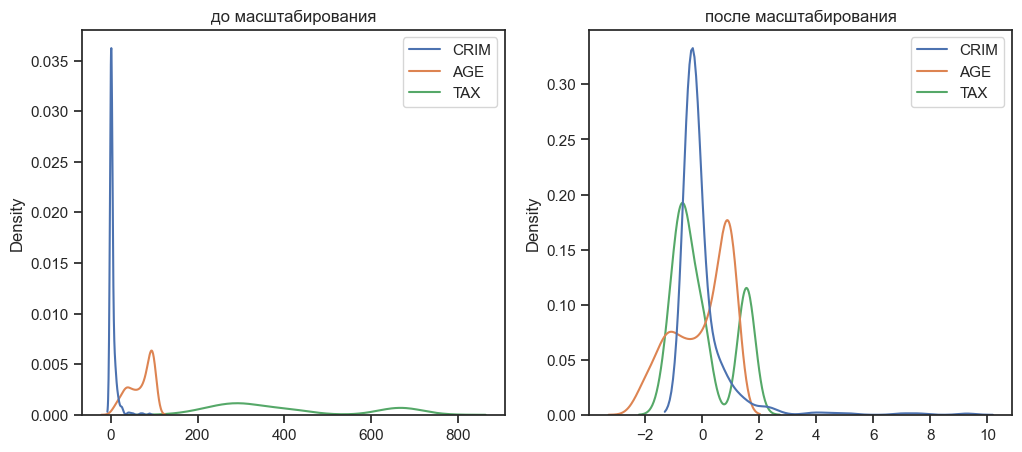

In [24]:
draw_kde(['CRIM', 'AGE', 'TAX'], data1, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [25]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [26]:
data_cs12_scaled_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02
mean,-3.947460e-17,7.894919e-17,2.650437e-16,6.767074e-17,-7.330996e-16,4.229421e-16,-2.424868e-16,-2.030122e-16,6.767074e-17,-1.127846e-17,-6.414622e-16,-3.721891e-16,-1.804553e-16
std,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00
min,-3.947463e-01,-4.790192e-01,-1.512627e+00,-2.533559e-01,-1.496368e+00,-3.942825e+00,-2.460664e+00,-1.254224e+00,-9.897678e-01,-1.317503e+00,-2.772799e+00,-3.784429e+00,-1.525646e+00
25%,-3.869156e-01,-4.790192e-01,-8.471877e-01,-2.533559e-01,-9.157119e-01,-5.781342e-01,-8.569721e-01,-7.950998e-01,-6.436055e-01,-7.633265e-01,-5.002905e-01,2.260804e-01,-7.630104e-01
50%,-3.657661e-01,-4.790192e-01,-3.584386e-01,-2.533559e-01,-1.445276e-01,-1.055408e-01,3.347622e-01,-3.212933e-01,-5.282180e-01,-4.508652e-01,2.417531e-01,3.944927e-01,-1.885756e-01
75%,-3.513765e-02,5.408937e-02,1.000939e+00,-2.533559e-01,6.357295e-01,4.699794e-01,9.012038e-01,5.516382e-01,1.664143e+00,1.506440e+00,7.519081e-01,4.465347e-01,5.424593e-01
max,8.707070e+00,3.785850e+00,2.374567e+00,3.947018e+00,2.876700e+00,3.623018e+00,1.110861e+00,3.920730e+00,1.664143e+00,1.771737e+00,1.586707e+00,4.465347e-01,3.425167e+00


In [27]:
data_cs12_scaled_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,-0.089192,0.048691,-0.053036,0.171998,-0.032324,-0.005697,-0.158861,0.024437,-0.100262,-0.118926,-0.095219,0.171532,0.123594
std,0.648552,1.103720,0.917413,1.275267,1.125639,1.058344,1.114857,0.935339,0.976503,0.954520,1.020140,0.749798,1.121509
min,-0.393857,-0.479019,-1.405758,-0.253356,-1.396568,-3.106364,-2.280433,-1.250742,-0.989768,-1.311608,-2.587288,-3.773162,-1.364130
25%,-0.388430,-0.479019,-0.829376,-0.253356,-0.988294,-0.608577,-1.340654,-0.755571,-0.643605,-0.789856,-0.778557,0.268036,-0.807954
50%,-0.372910,-0.479019,-0.197422,-0.253356,-0.271546,-0.157729,0.029472,-0.141013,-0.528218,-0.610044,0.195375,0.403077,-0.133801
75%,-0.113360,0.054089,1.000939,-0.253356,0.504175,0.455483,0.879135,0.685213,-0.297443,0.115103,0.751908,0.446535,0.763666
max,3.853136,3.572606,2.076757,3.947018,2.876700,2.922826,1.110861,2.405547,1.664143,1.506440,1.215685,0.446535,3.564211


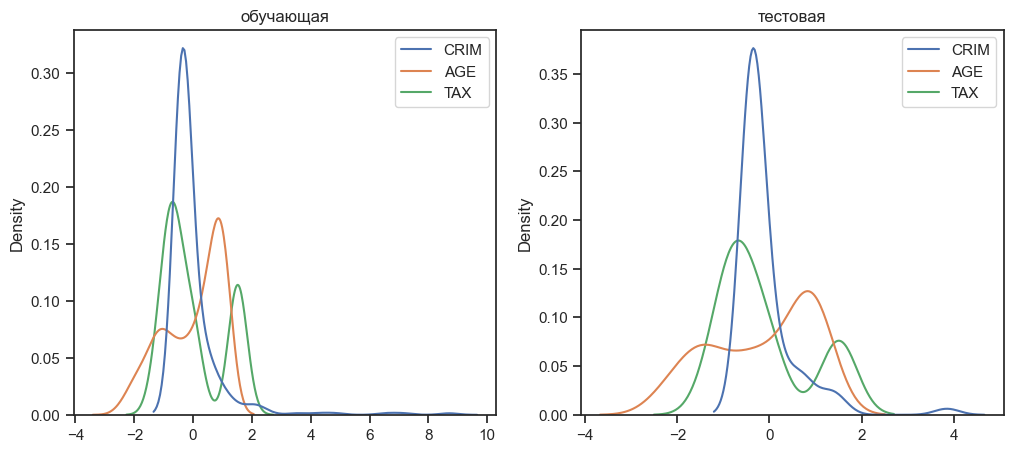

In [28]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['CRIM', 'AGE', 'TAX'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

### Mean Normalisation

In [29]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [30]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,-0.001965,0.002289,-0.002736,0.008210,-0.001482,-0.000151,-0.008919,0.000947,-0.007575,-0.007719,-0.004379,0.008129,0.005006
std,0.103433,0.239541,0.253239,0.252971,0.234673,0.133739,0.287216,0.190833,0.375367,0.321207,0.230474,0.226435,0.207331
min,-0.043370,-0.112317,-0.389131,-0.060317,-0.342178,-0.521135,-0.688967,-0.242364,-0.372947,-0.426481,-0.636035,-0.894460,-0.308161
25%,-0.042520,-0.112317,-0.217943,-0.060317,-0.209398,-0.076941,-0.250502,-0.153203,-0.242512,-0.248523,-0.125397,0.054329,-0.155111
50%,-0.040419,-0.112317,-0.092210,-0.060317,-0.033049,-0.015195,0.081373,-0.054166,-0.199034,-0.153581,0.055454,0.093595,-0.036671
75%,-0.004822,0.012683,0.257497,-0.060317,0.145374,0.062214,0.251815,0.120202,0.627053,0.487641,0.172476,0.105540,0.128364
max,0.956630,0.887683,0.610869,0.939683,0.657822,0.478865,0.311033,0.757636,0.627053,0.573519,0.363965,0.105540,0.719924


In [31]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [32]:
data_cs22_scaled_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02
mean,-4.229421e-18,-5.639228e-18,8.176881e-17,1.409807e-18,-1.691768e-16,5.427757e-17,-7.471977e-17,-3.947460e-17,1.198336e-17,-8.458842e-18,-1.512018e-16,-8.458842e-17,-3.947460e-17
std,1.100430e-01,2.348469e-01,2.576643e-01,2.384529e-01,2.290362e-01,1.323833e-01,2.804380e-01,1.935459e-01,3.774019e-01,3.242192e-01,2.297487e-01,2.367289e-01,2.023084e-01
min,-4.337006e-02,-1.123175e-01,-3.891309e-01,-6.031746e-02,-3.421781e-01,-5.211349e-01,-6.889674e-01,-2.423643e-01,-3.729469e-01,-4.264813e-01,-6.360351e-01,-8.944603e-01,-3.081608e-01
25%,-4.250971e-02,-1.123175e-01,-2.179433e-01,-6.031746e-02,-2.093980e-01,-7.641371e-02,-2.399457e-01,-1.536438e-01,-2.425121e-01,-2.470920e-01,-1.147585e-01,5.343474e-02,-1.541182e-01
50%,-4.018606e-02,-1.123175e-01,-9.221012e-02,-6.031746e-02,-3.304946e-02,-1.394964e-02,9.373089e-02,-6.208621e-02,-1.990338e-01,-1.459469e-01,5.545424e-02,9.323946e-02,-3.808983e-02
75%,-3.860509e-03,1.268254e-02,2.574966e-01,-6.031746e-02,1.453738e-01,6.211857e-02,2.523303e-01,1.065977e-01,6.270531e-01,4.876409e-01,1.724755e-01,1.055397e-01,1.095697e-01
max,9.566299e-01,8.876825e-01,6.108691e-01,9.396825e-01,6.578219e-01,4.788651e-01,3.110326e-01,7.576357e-01,6.270531e-01,5.735187e-01,3.639649e-01,1.055397e-01,6.918392e-01


In [33]:
data_cs22_scaled_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,-0.009799,0.011417,-0.013644,0.040948,-0.007392,-0.000753,-0.044480,0.004722,-0.037779,-0.038497,-0.021842,0.040542,0.024964
std,0.071255,0.258793,0.236009,0.303608,0.257403,0.139884,0.312151,0.180743,0.367949,0.308982,0.234004,0.177217,0.226530
min,-0.043272,-0.112317,-0.361638,-0.060317,-0.319357,-0.410577,-0.638504,-0.241691,-0.372947,-0.424573,-0.593482,-0.891797,-0.275537
25%,-0.042676,-0.112317,-0.213361,-0.060317,-0.225996,-0.080437,-0.375373,-0.146005,-0.242512,-0.255680,-0.178588,0.063351,-0.163196
50%,-0.040971,-0.112317,-0.050788,-0.060317,-0.062095,-0.020848,0.008252,-0.027249,-0.199034,-0.197474,0.044816,0.095268,-0.027026
75%,-0.012455,0.012683,0.257497,-0.060317,0.115291,0.060202,0.246151,0.132410,-0.112077,0.037259,0.172476,0.105540,0.154251
max,0.423337,0.837683,0.534256,0.939683,0.657822,0.386319,0.311033,0.464844,0.627053,0.487641,0.278858,0.105540,0.719924


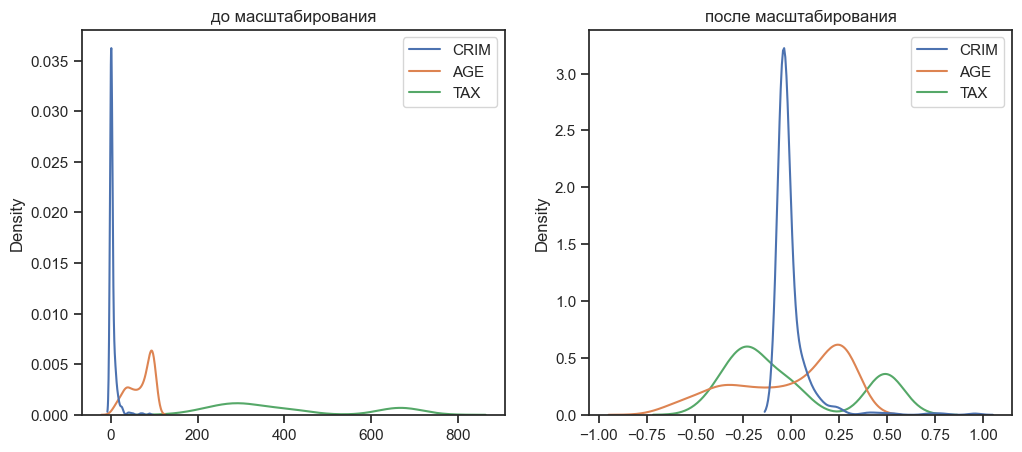

In [34]:
draw_kde(['CRIM', 'AGE', 'TAX'], data1, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

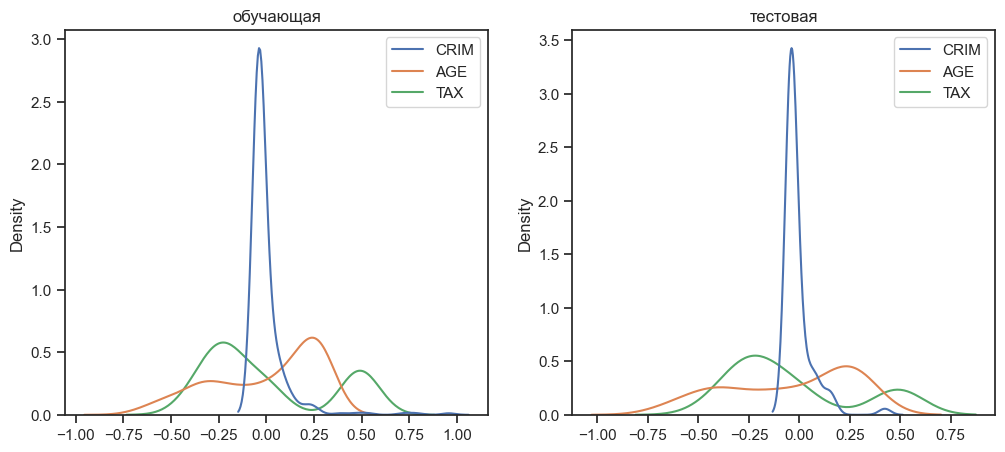

In [35]:
draw_kde(['CRIM', 'AGE', 'TAX'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

Распределение на тестовой и тренировочной выборке отличаются но незначительно.

Сравним разные средства масштабирования по тестовой выборке

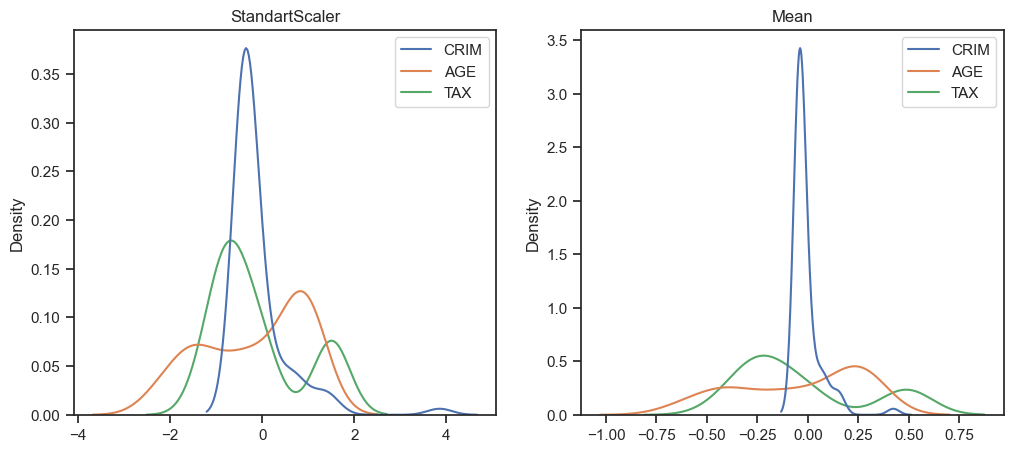

In [36]:
draw_kde(['CRIM', 'AGE', 'TAX'], data_cs12_scaled_test, data_cs22_scaled_test, 'StandartScaler', 'Mean')

Масштабирование MinMax

In [38]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,0.041405,0.114607,0.386395,0.068528,0.340696,0.520984,0.680049,0.243311,0.365372,0.418762,0.631656,0.902589,0.304611
std,0.103433,0.239541,0.253239,0.252971,0.234673,0.133739,0.287216,0.190833,0.375367,0.321207,0.230474,0.226435,0.201668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000850,0.000000,0.171188,0.000000,0.132780,0.444194,0.438465,0.089161,0.130435,0.177958,0.510638,0.948789,0.148869
50%,0.002951,0.000000,0.296921,0.000000,0.309129,0.505940,0.770340,0.188198,0.173913,0.272901,0.691489,0.988055,0.264073
75%,0.038548,0.125000,0.646628,0.000000,0.487552,0.583349,0.940783,0.362566,1.000000,0.914122,0.808511,1.000000,0.424600
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)

# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

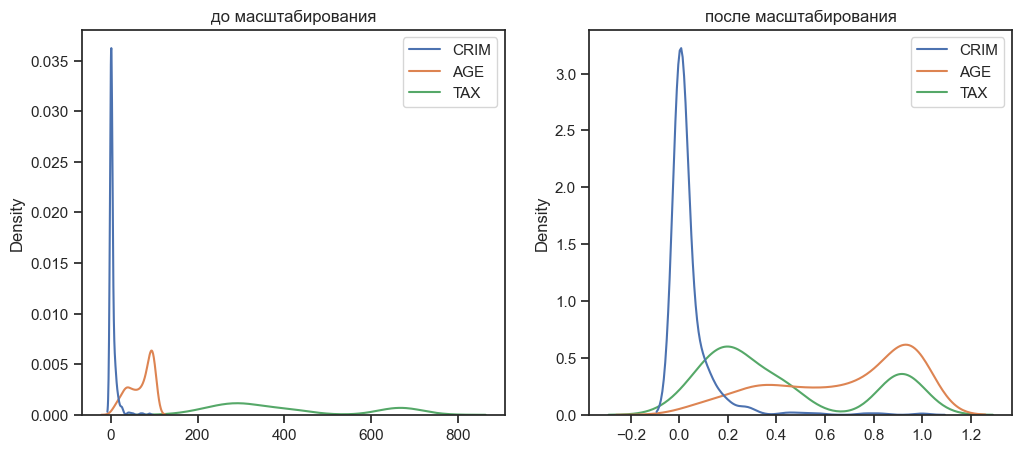

In [40]:
draw_kde(['CRIM', 'AGE', 'TAX'], data1, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

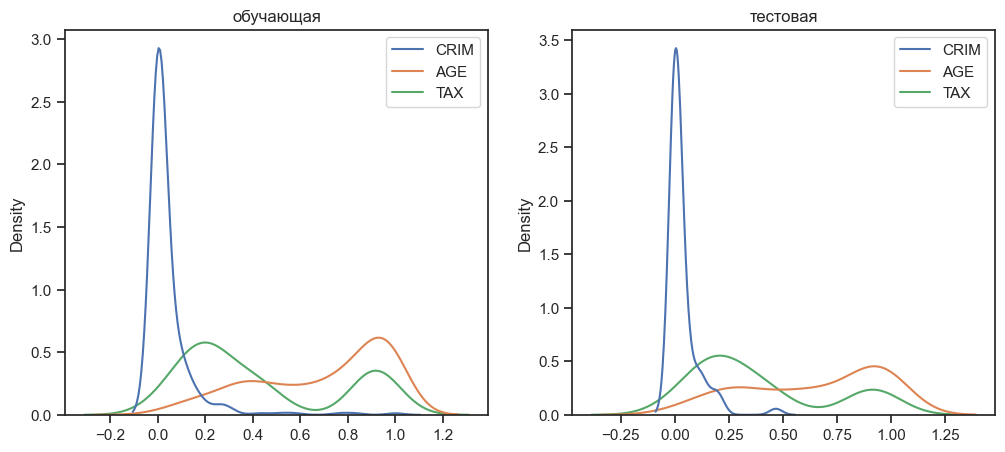

In [41]:
draw_kde(['CRIM', 'AGE', 'TAX'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

## Обработка выбросов

In [42]:
data1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [43]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()


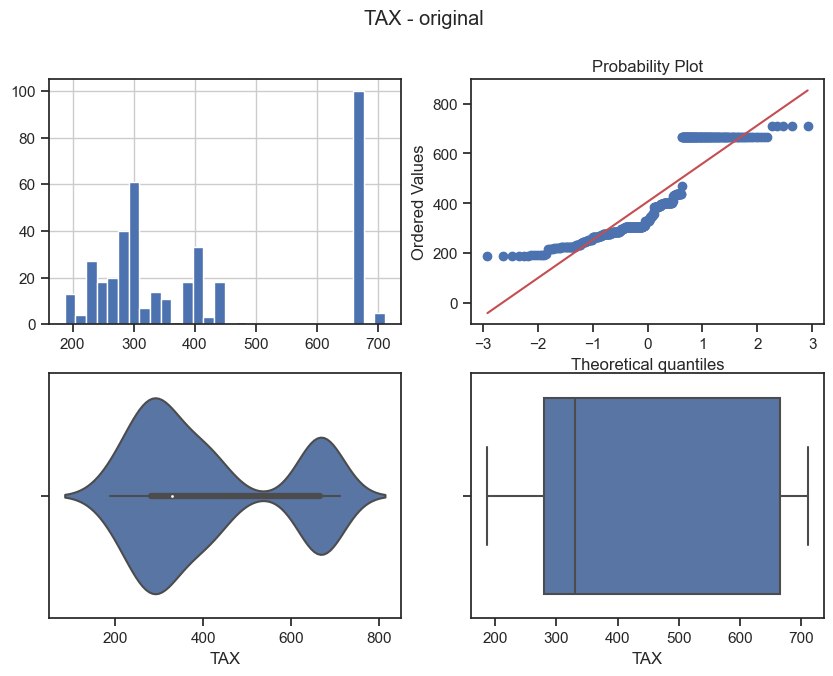

In [44]:
diagnostic_plots(data1, 'TAX', 'TAX - original')

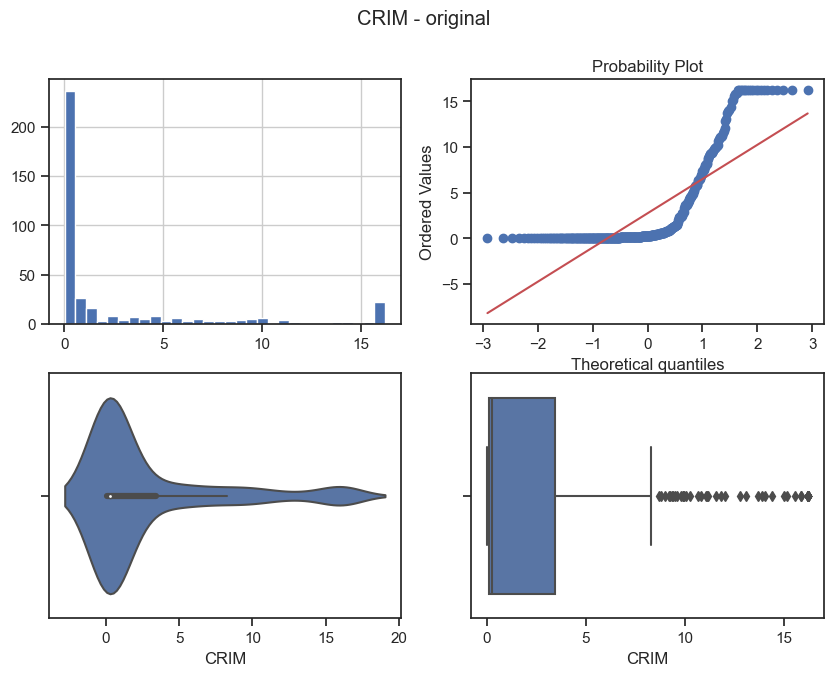

In [79]:
diagnostic_plots(data1, 'CRIM', 'CRIM - original')

In [49]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col):
    lower_boundary = df[col].quantile(0.05)
    upper_boundary = df[col].quantile(0.95)
    return lower_boundary, upper_boundary


Удаление выброса

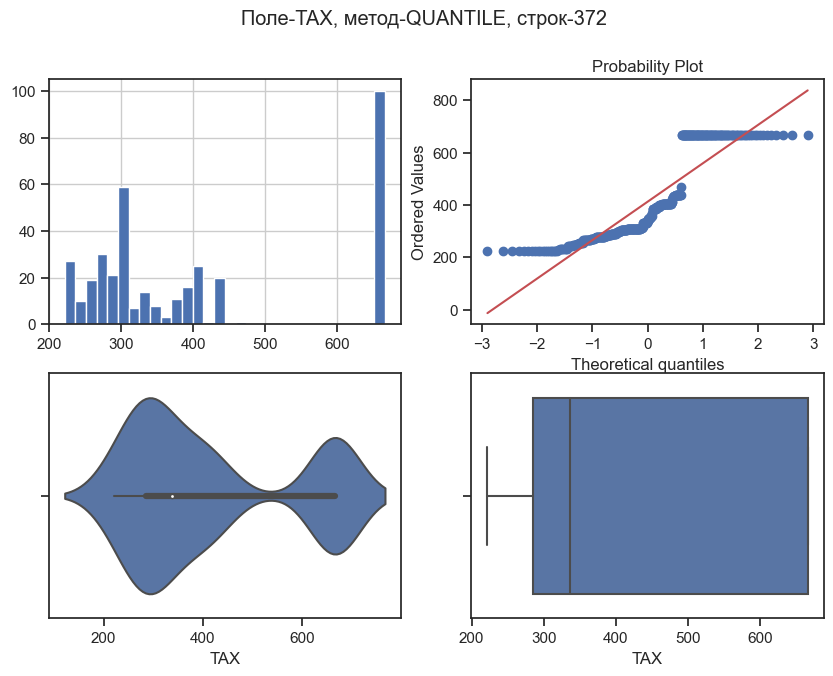

In [50]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data1, "TAX")
# Флаги для удаления выбросов
outliers_temp = np.where(data1["TAX"] > upper_boundary, True, np.where(data1["TAX"] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = data1.loc[~(outliers_temp), ]
title = 'Поле-{}, метод-{}, строк-{}'.format("TAX", "QUANTILE", data_trimmed.shape[0])
diagnostic_plots(data_trimmed, "TAX", title)


Замена выброса

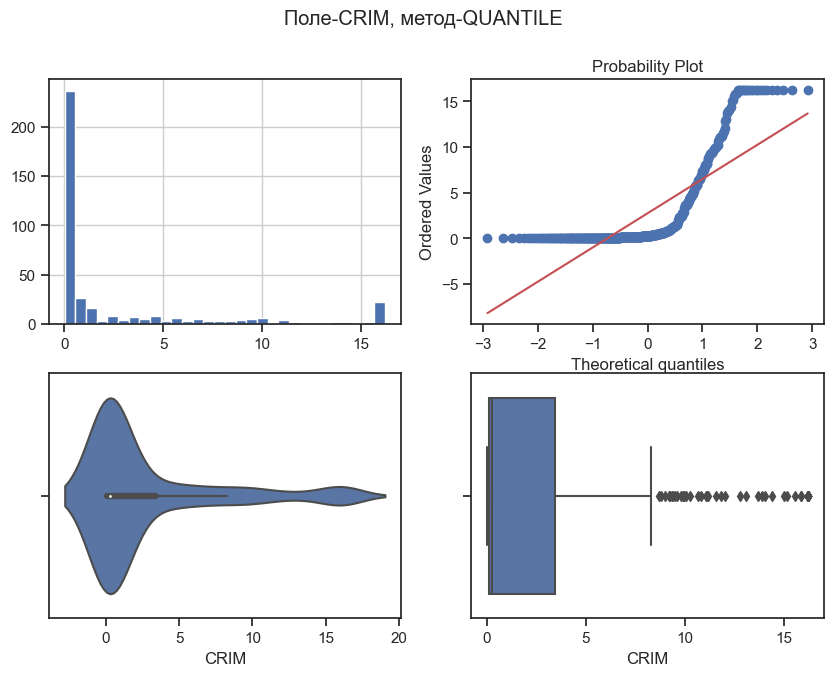

In [51]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data1, "CRIM")
# Изменение данных
data1["CRIM"] = np.where(data1["CRIM"] > upper_boundary, upper_boundary, np.where(data1["CRIM"] < lower_boundary, lower_boundary, data1["CRIM"]))

title = 'Поле-{}, метод-{}'.format("CRIM", "QUANTILE")
diagnostic_plots(data1, "CRIM", title)


## Отбор признаков

### Корреляция признаков

<AxesSubplot:>

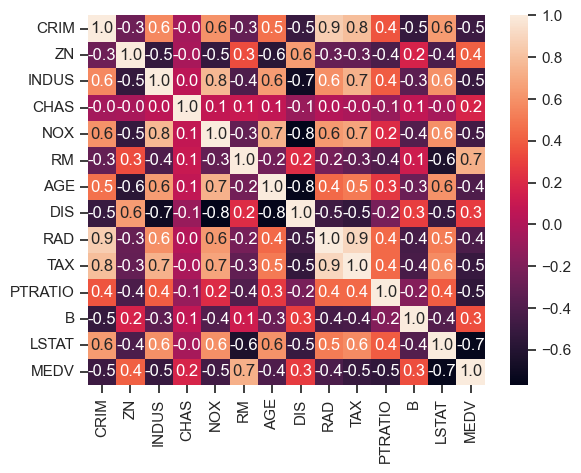

In [55]:
sns.heatmap(data1.corr(), annot=True, fmt='.1f')

In [56]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df, x):
    cr = data1.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= x]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [57]:
make_corr_df(data1, 0.8)

,f1,f2,corr
0,TAX,RAD,0.900000
1,RAD,TAX,0.900000
2,RAD,CRIM,0.856786
3,CRIM,RAD,0.856786


Получили признаки коррелирующие между собой максимально сильно (более 80%)

### Один из методов вложения

In [70]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98
239,0.09252,30.0,4.93,0.0,0.428,6.606,42.2,6.1899,6,300,16.6,383.78,7.37
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5,296,16.6,396.90,14.69
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77
454,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24,666,20.2,6.68,18.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0.54011,20.0,3.97,0.0,0.647,7.203,81.8,2.1121,5,264,13.0,392.80,9.59
327,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79
85,0.05735,0.0,4.49,0.0,0.449,6.630,56.1,4.4377,3,247,18.5,392.30,6.53
306,0.07503,33.0,2.18,0.0,0.472,7.420,71.9,3.0992,7,222,18.4,396.90,6.47


In [73]:
y_train

445    11.8
239    23.3
172    23.1
400     5.6
454    14.9
       ... 
260    33.8
327    22.2
85     26.6
306    33.4
44     21.2
Name: MEDV, Length: 315, dtype: float64

In [75]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Преобразование целевой переменной в категории
median_value = np.median(y_train)
y_train_binary = (y_train >= median_value).astype(int)

# Проверка преобразованных значений
print(y_train_binary)

# Обучение модели логистической регрессии
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X_train, y_train_binary)

# Коэффициенты регрессии
print(e_lr1.coef_)


445    0
239    1
172    1
400    0
454    0
      ..
260    1
327    1
85     1
306    1
44     1
Name: MEDV, Length: 315, dtype: int64
[[-2.96572574e-01  1.51669782e-03  1.63469631e-02  2.04924714e+00
  -2.43238230e+00  2.37663649e+00 -4.86560567e-02 -7.28597455e-01
   2.09119123e-01 -5.05970854e-03 -5.81421756e-01  6.24601645e-03
  -3.11633594e-01]]


In [78]:
sel_e_lr1 = SelectFromModel(e_lr1)

# Преобразование целевой переменной в категории
median_value = np.median(y_test)
y_train_binary = (y_test >= median_value).astype(int)

sel_e_lr1.fit(X_test, y_train_binary)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Все признаки хорошие

## Вывод:
Датасет необходимо подготавливать перед решением любой задачи по машинному обучению.

Масштабирование данных позволяет привести все параметры к одному диапазону, при этом не меняя формы распределения. Часть методов центрирует распределение, часть сохраняет смещение на отрезке.
Для некоторых зависимостей может быть полезно удалить или заменить выбросы.
Отбор признаков показал, что все признаки не малозначительны.